In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm
import os

In [15]:
class SignLanguageMnist(Dataset):
    def __init__(self, img_file, transform=None):
        self.labels_map = {
            idx: chr(letter) for idx, letter in zip(range(26), range(65, 91))
        }
        self.imgs = pd.read_csv(img_file)
        self.labels = self.imgs["label"]
        self.imgs.drop(columns=["label"], inplace=True)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        img = torch.tensor(self.imgs.loc[index, :]).view((28, 28))
        if self.transform:
            img = self.transform(img)
        return img, self.labels_map[self.labels[index]]

In [16]:
dataset = SignLanguageMnist("../data/sign-language-mnist/sign_mnist_test.csv")

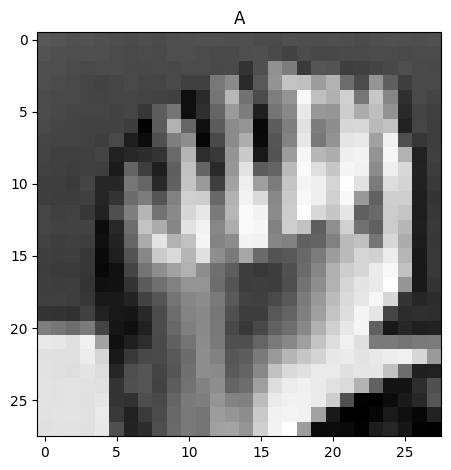

In [22]:
img, label = dataset[3]
plt.imshow(img, cmap="Greys")
plt.title(label)
plt.tight_layout()
plt.show()